# Private vs Public – Universities classification

# The data

* Private A factor with levels No and Yes indicating private or public university

* Apps Number of applications received

* Accept Number of applications accepted

* Enroll Number of new students enrolled

* Top10perc Pct. new students from top 10% of H.S. class

* Top25perc Pct. new students from top 25% of H.S. class

* F_Undergrad Number of fulltime undergraduates

* P_Undergrad Number of parttime undergraduates

* Outstate Out-of-state tuition

* Room_Board Room and board costs

* Books Estimated book costs

* Personal Estimated personal spending

* PhD Pct. of faculty with Ph.D.’s

* Terminal Pct. of faculty with terminal degree

* S.F.Ratio Student/faculty ratio

* perc_alumni Pct. alumni who donate

* Expend Instructional expenditure per student

* Grad_Rate . Graduation rate


# 1. Import Libraries

Import the libraries we usually use for data analysis.

In [230]:
import pandas as pd # provides create a Dataframe.
import numpy as np  # provides objects for multi-dimensional arrays
import seaborn as sns #  data visualization library based on matplotlib
import matplotlib.pyplot as plt # Use to creates a figure, creates a plotting area in a figure, 
                                # plots some lines in a plotting area, decorates the plot with labels.

%matplotlib inline
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

# 2. Get the Data

Read in the College_data file using read_csv. Figure out how to set the first column as the index.

In [231]:
data = pd.read_csv('D:/Juypter_notebook/College_data.csv', index_col = 0)

Check the head of the data

In [232]:
data.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


Check the tail of the data

In [233]:
data.tail()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99
York College of Pennsylvania,Yes,2989,1855,691,28,63,2988,1726,4990,3560,500,1250,75,75,18.1,28,4509,99


Check the columns of the data

In [234]:
data.shape

(777, 18)

In [235]:
data.columns

Index(['Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F_Undergrad', 'P_Undergrad', 'Outstate', 'Room_Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S_F_Ratio', 'perc_alumni', 'Expend',
       'Grad_Rate'],
      dtype='object')

Check the info() method on the data.
prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.

In [236]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F_Undergrad  777 non-null    int64  
 7   P_Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room_Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S_F_Ratio    777 non-null    float64
 15  perc_alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad_Rate    777 non-null    int64  
dtypes: 

Check the describe() method on the data. It used for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame.

In [237]:
data.describe().round(2)


,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
count,777.00,777.00,777.00,777.00,777.0,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00
mean,3001.64,2018.80,779.97,27.56,55.8,3699.91,855.30,10440.67,4357.53,549.38,1340.64,72.66,79.70,14.09,22.74,9660.17,65.46
std,3870.20,2451.11,929.18,17.64,19.8,4850.42,1522.43,4023.02,1096.70,165.11,677.07,16.33,14.72,3.96,12.39,5221.77,17.18
min,81.00,72.00,35.00,1.00,9.0,139.00,1.00,2340.00,1780.00,96.00,250.00,8.00,24.00,2.50,0.00,3186.00,10.00
25%,776.00,604.00,242.00,15.00,41.0,992.00,95.00,7320.00,3597.00,470.00,850.00,62.00,71.00,11.50,13.00,6751.00,53.00
50%,1558.00,1110.00,434.00,23.00,54.0,1707.00,353.00,9990.00,4200.00,500.00,1200.00,75.00,82.00,13.60,21.00,8377.00,65.00
75%,3624.00,2424.00,902.00,35.00,69.0,4005.00,967.00,12925.00,5050.00,600.00,1700.00,85.00,92.00,16.50,31.00,10830.00,78.00
max,48094.00,26330.00,6392.00,96.00,100.0,31643.00,21836.00,21700.00,8124.00,2340.00,6800.00,103.00,100.00,39.80,64.00,56233.00,118.00


# 3. Exploratory Data Analysis (EDA)

Create a scatterplot of Grad.Rate versus Room.Board where the points are colored by the Private column.

<AxesSubplot:xlabel='Room_Board', ylabel='Grad_Rate'>

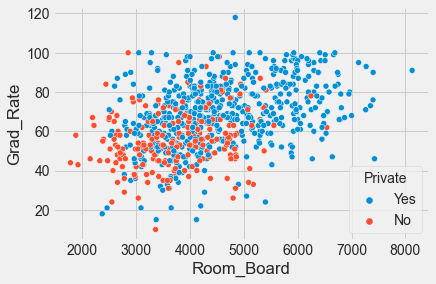

In [238]:
sns.scatterplot(x='Room_Board', y='Grad_Rate', data=data, hue='Private')

Create a scatterplot of F.Undergrad versus Outstate where the points are colored by the Private column.

<AxesSubplot:xlabel='Outstate', ylabel='F_Undergrad'>

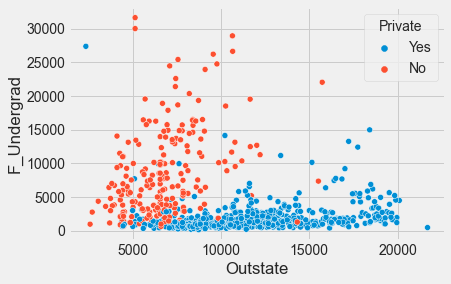

In [239]:
sns.scatterplot(x = 'Outstate', y = 'F_Undergrad', data=data, hue='Private')

Create a stacked histogram showing Out of State Tuition based on the Private column.

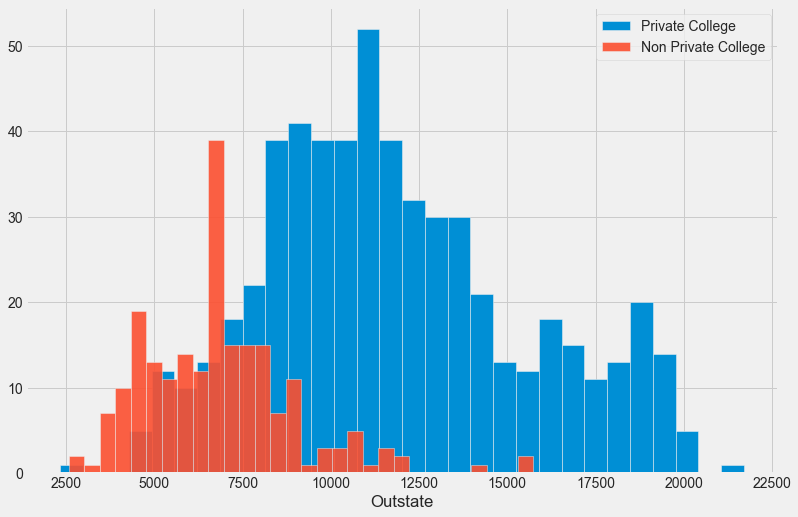

In [240]:
plt.figure(figsize=(12, 8))

data.loc[data.Private == 'Yes', 'Outstate'].hist(label="Private College", bins=30)
data.loc[data.Private == 'No', 'Outstate'].hist(label="Non Private College", bins=30,alpha=0.9)

plt.xlabel('Outstate')
plt.legend()

Create a similar histogram for the Grad.Rate column.

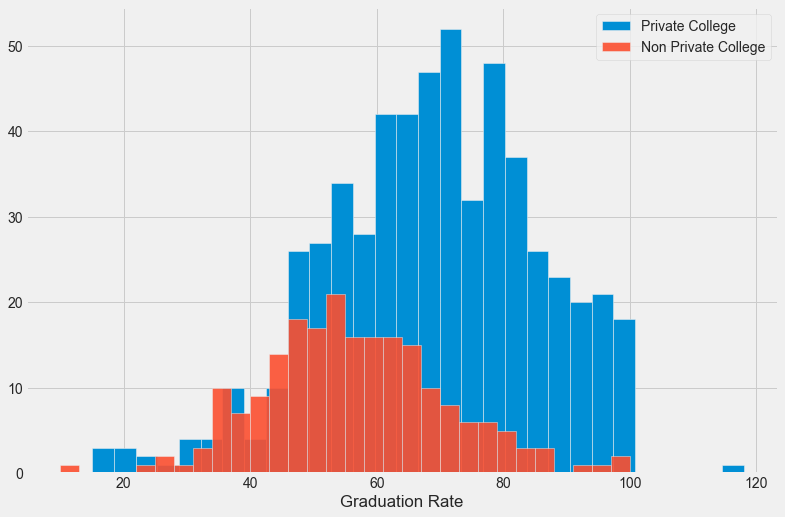

In [241]:
plt.figure(figsize=(12, 8))

data.loc[data.Private == 'Yes', 'Grad_Rate'].hist(label="Private College", bins=30)
data.loc[data.Private == 'No', 'Grad_Rate'].hist(label="Non Private College", bins=30,alpha=0.9)

plt.xlabel('Graduation Rate')
plt.legend()

There seems to be a private school with a graduation rate of higher than 100%.What is the name of that school?

In [242]:
data.loc[data.Grad_Rate > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


Set that school's graduation rate to 100 so it makes sense. when doing this operation, so use dataframe operations or just re-do the histogram visualization to make sure it actually went through.

In [243]:
data.loc[data.Grad_Rate > 100, 'Grad_Rate'] = 100

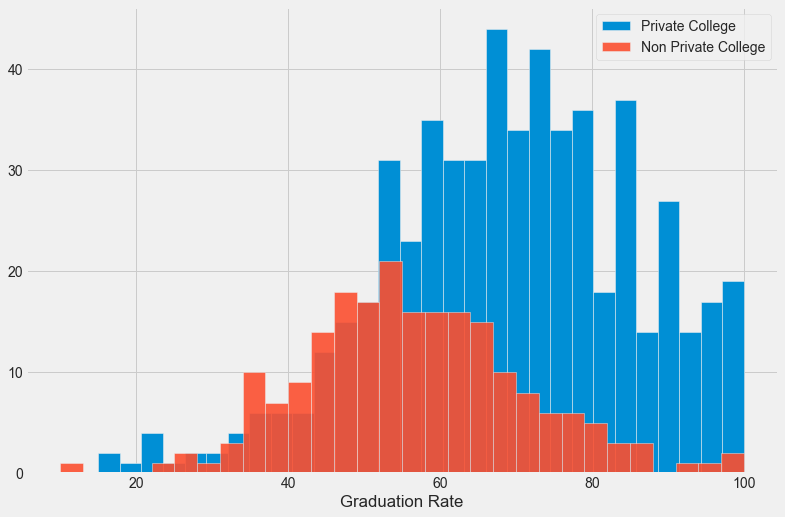

In [244]:
plt.figure(figsize=(12, 8))

data.loc[data.Private == 'Yes', 'Grad_Rate'].hist(label="Private College", bins=30)
data.loc[data.Private == 'No', 'Grad_Rate'].hist(label="Non Private College", bins=30,alpha=0.9)

plt.xlabel('Graduation Rate')
plt.legend()

# 4. K Means Cluster Creation

Import KMeans from SciKit Learn.

The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. 
The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided.

we actually have the labels for this data set, but we will NOT use them for the KMeans clustering algorithm, 
since that is an unsupervised learning algorithm.

In [245]:
from sklearn.cluster import KMeans 


Create an instance of a K Means model with 2 clusters.

In [246]:
kmeans = KMeans(n_clusters = 2) 

Fit the model to all the data except for the Private label.

In [247]:
kmeans.fit(data.drop( 'Private' , axis = 1)) 

KMeans(n_clusters=2)

Get the cluster center vectors

In [248]:
kmeans.cluster_centers_ 

array([[1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01],
       [1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.50926756e+01]])

# 5. Evaluation

Create a new column for df called 'Cluster', which is a 1 for a Private school, and a 0 for a public school.

In [249]:
data['Private'] = data.Private.astype("category").cat.codes

In [250]:
data.Private

Abilene Christian University      1
Adelphi University                1
Adrian College                    1
Agnes Scott College               1
Alaska Pacific University         1
                                 ..
Worcester State College           0
Xavier University                 1
Xavier University of Louisiana    1
Yale University                   1
York College of Pennsylvania      1
Name: Private, Length: 777, dtype: int8

In [251]:
data.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [252]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

A Classification report is used to measure the quality of predictions from a classification.
confusion_matrix is a table that is often used to describe the performance of a classification model (or "classifier"). 
on a set of test data for which the true values are known.

In [253]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(data.Private, kmeans.labels_))

[[ 74 138]
 [ 34 531]]


In [254]:
print(accuracy_score(data.Private, kmeans.labels_))

0.7786357786357786


In [255]:
print(classification_report(data.Private, kmeans.labels_))

              precision    recall  f1-score   support

           0       0.69      0.35      0.46       212
           1       0.79      0.94      0.86       565

    accuracy                           0.78       777
   macro avg       0.74      0.64      0.66       777
weighted avg       0.76      0.78      0.75       777



# Scaling the data

If a feature’s variance is orders of magnitude more than the variance of other features, that particular feature might dominate other features in the dataset, which is not something we want happening in our model.

standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation.

In [256]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

X = data.drop('Private', axis=1)
y = data.Private

X = scalar.fit_transform(X)

kmeans = KMeans(2)
kmeans.fit(X)

print(kmeans.cluster_centers_)

print(accuracy_score(y, kmeans.labels_))
print(confusion_matrix(y, kmeans.labels_))
print(classification_report(y, kmeans.labels_))

[[-0.32661962 -0.30530339 -0.25143507 -0.49913749 -0.50267293 -0.22105053
  -0.03848678 -0.45792911 -0.37283453 -0.12172587  0.04875211 -0.49062908
  -0.47906195  0.23583839 -0.30713916 -0.42464126 -0.36177249]
 [ 0.54548844  0.50988814  0.41992248  0.83361106  0.83951561  0.36917718
   0.06427689  0.76478882  0.6226721   0.20329475 -0.08142105  0.81940114
   0.80008284 -0.39387442  0.51295406  0.70919469  0.60419735]]
0.4774774774774775
[[146  66]
 [340 225]]
              precision    recall  f1-score   support

           0       0.30      0.69      0.42       212
           1       0.77      0.40      0.53       565

    accuracy                           0.48       777
   macro avg       0.54      0.54      0.47       777
weighted avg       0.64      0.48      0.50       777



# Thank you